In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler

df = pd.read_csv('./data.csv')

df = df.drop(['Unnamed: 32', 'id'], axis=1)
# df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non-null float64
concave points_se          569 n

In [124]:
data = df.drop(['diagnosis'], axis=1)
target = df['diagnosis']

In [125]:
kf = KFold(n_splits=5, shuffle=True)
kn = KNeighborsClassifier(n_neighbors=1)

mat_data = data.values
mat_target = target.values

y_true, y_pred = [], []
# for tr, ts in kf.split(mat_data):
#     kn.fit(mat_data[tr], mat_target[tr])
#     y_true += list(mat_target[ts])
#     y_pred += list(mat_data[ts])

# len(y_true)
# len(y_pred)
def get_precision(data,target, model):
    errors = 0
    for tr, ts in kf.split(data):
        model.fit(data[tr], target[tr])
        errors += sum(target[ts] != model.predict(data[ts]))


    quality = (1 - errors/len(data))*100
    return quality

get_precision(mat_data,mat_target, kn)
# accuracy_score

92.44288224956063

In [126]:
dr = df[['diagnosis', 'radius_mean']]
dr

,diagnosis,radius_mean
0,M,17.990
1,M,20.570
2,M,19.690
3,M,11.420
4,M,20.290
5,M,12.450
6,M,18.250
7,M,13.710
8,M,13.000
9,M,12.460


In [127]:
dr.melt(id_vars='diagnosis')

,diagnosis,variable,value
0,M,radius_mean,17.990
1,M,radius_mean,20.570
2,M,radius_mean,19.690
3,M,radius_mean,11.420
4,M,radius_mean,20.290
5,M,radius_mean,12.450
6,M,radius_mean,18.250
7,M,radius_mean,13.710
8,M,radius_mean,13.000
9,M,radius_mean,12.460


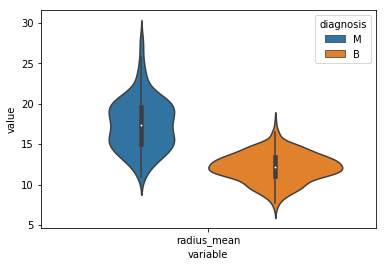

In [128]:
sns.violinplot(x='variable', y='value', hue='diagnosis',data=dr.melt(id_vars='diagnosis'))

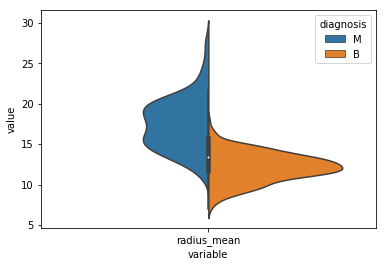

In [129]:
sns.violinplot(x='variable', y='value', hue='diagnosis',data=dr.melt(id_vars='diagnosis'), split=True)

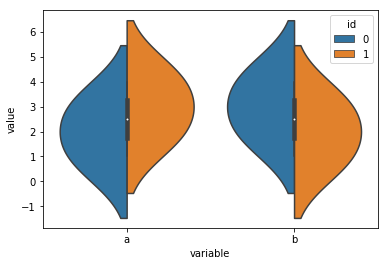

In [130]:
a = pd.DataFrame({'id': [0,1,0,1], 'a': [1,2,3,4], 'b': [4,3,2,1]})
# a.melt(id_vars='id')
sns.violinplot(x='variable', y='value', hue='id',data=a.melt(id_vars='id'), split=True)

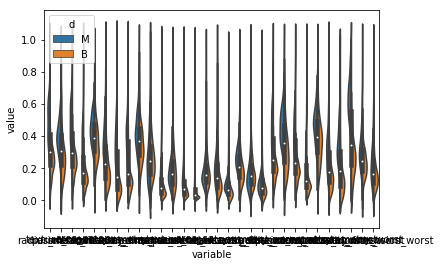

In [131]:
mm = MinMaxScaler()

df1 = mm.fit_transform(data)
df1 = pd.DataFrame(df1, columns=data.columns);

df1['d'] = target
sns.violinplot(x='variable', y='value', hue='d',data=df1.melt(id_vars='d'), split=True)
# sns.xticks(rotation="vertical")
# sns.violinplot(x='variable', y='value', hue='diagnosis',data=df.melt(id_vars='diagnosis'), split=True)

In [132]:
get_precision(df1.drop('d', axis=1).values, target, kn)

94.72759226713534

In [133]:
df2 = df1.drop(['smoothness_mean', 'symmetry_mean', 'fractal_dimension_mean', 'texture_se', 'smoothness_se', 
                'symmetry_se','fractal_dimension_se', 'symmetry_worst', 'fractal_dimension_worst'], axis=1)
df2.head()
# df2['d']

,radius_mean,texture_mean,perimeter_mean,area_mean,compactness_mean,concavity_mean,concave points_mean,radius_se,perimeter_se,area_se,...,concave points_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,d
0,0.521037,0.022658,0.545989,0.363733,0.792037,0.703140,0.731113,0.356147,0.369034,0.273811,...,0.300625,0.620776,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,M
1,0.643144,0.272574,0.615783,0.501591,0.181768,0.203608,0.348757,0.156437,0.124440,0.125660,...,0.253836,0.606901,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,M
2,0.601496,0.390260,0.595743,0.449417,0.431017,0.462512,0.635686,0.229622,0.180370,0.162922,...,0.389847,0.556386,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,M
3,0.210090,0.360839,0.233501,0.102906,0.811361,0.565604,0.522863,0.139091,0.126655,0.038155,...,0.353665,0.248310,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,M
4,0.629893,0.156578,0.630986,0.489290,0.347893,0.463918,0.518390,0.233822,0.220563,0.163688,...,0.357075,0.519744,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,M


In [134]:
get_precision(df2.drop('d', axis=1).values, target, kn)

96.13356766256591

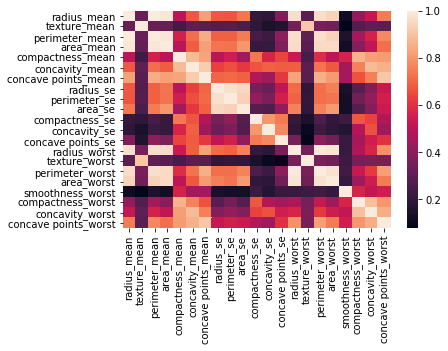

In [135]:
sns.heatmap(df2.corr())

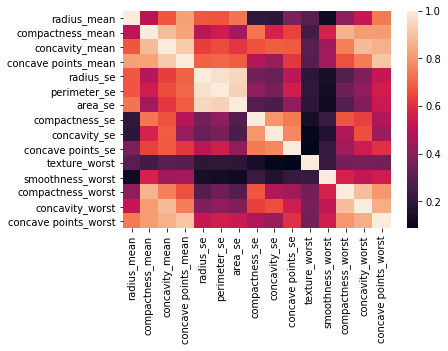

In [136]:
df3 = df2.drop(['perimeter_mean', 'area_mean', 'radius_worst', 'perimeter_worst', 'area_worst', 'texture_mean'], axis=1)
sns.heatmap(df3.corr())

In [137]:
# get_precision(df3.drop('d', axis=1).values, target, kn)

In [138]:
# get_precision(df2.drop('d', axis=1).values, target, kn)

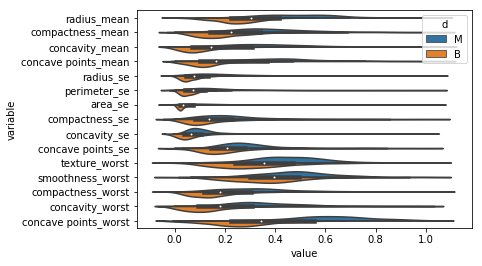

In [142]:
sns.violinplot(x='value', y='variable', hue='d',data=df3.melt(id_vars='d'), split=True)

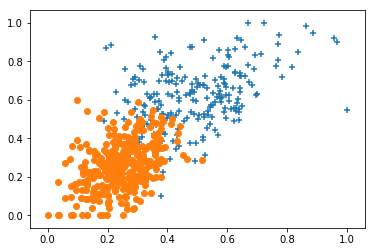

In [151]:
plt.scatter(df3['radius_mean'][df3['d'] == 'M'], df3['concave points_worst'][df3['d'] == 'M'], marker='+')
plt.scatter(df3['radius_mean'][df3['d'] == 'B'], df3['concave points_worst'][df3['d'] == 'B'], marker='o')
# df3['radius_mean'][df3['d'] == 'N']
# df3['concave points_worst'][df3['d'] == 'M']

In [153]:
get_precision(df3[['radius_mean', 'concave points_worst']].values, target, kn)

91.21265377855887

In [158]:
df4 = df3[['radius_mean', 'concave points_worst']]

x_min, x_max = df3['radius_mean'].min() - 0.5, df3['radius_mean'].max() + 0.5
y_min, y_max = df3['concave points_worst'].min() - 0.5, df3['concave points_worst'].max() + 0.5
# x_min, x_max
# y_min, y_max

xx, yy = np.meshgrid(np.arange(3), np.arange(3,7))
np.c_[xx.ravel(), yy.ravel()]

array([[0, 3],
       [1, 3],
       [2, 3],
       [0, 4],
       [1, 4],
       [2, 4],
       [0, 5],
       [1, 5],
       [2, 5],
       [0, 6],
       [1, 6],
       [2, 6]])

In [159]:
xx, yy = np.meshgrid(np.arange(x_min, x_max, .02), np.arange(y_min, y_max, .02))
xx.shape

(100, 100)

In [174]:
kn = KNeighborsClassifier(n_neighbors=1)
kn.fit(df4.values, target)
z = kn.predict(np.c_[xx.ravel(), yy.ravel()])
z = z.reshape(xx.shape)
z = np.where(z == 'M', 0, 1)

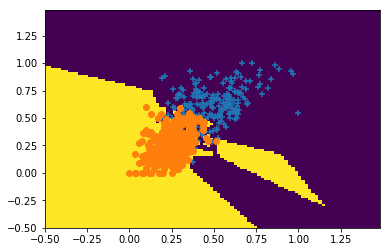

In [176]:
plt.pcolormesh(xx, yy, z)
plt.scatter(df3['radius_mean'][df3['d'] == 'M'], df3['concave points_worst'][df3['d'] == 'M'], marker='+')
plt.scatter(df3['radius_mean'][df3['d'] == 'B'], df3['concave points_worst'][df3['d'] == 'B'], marker='o')